In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler

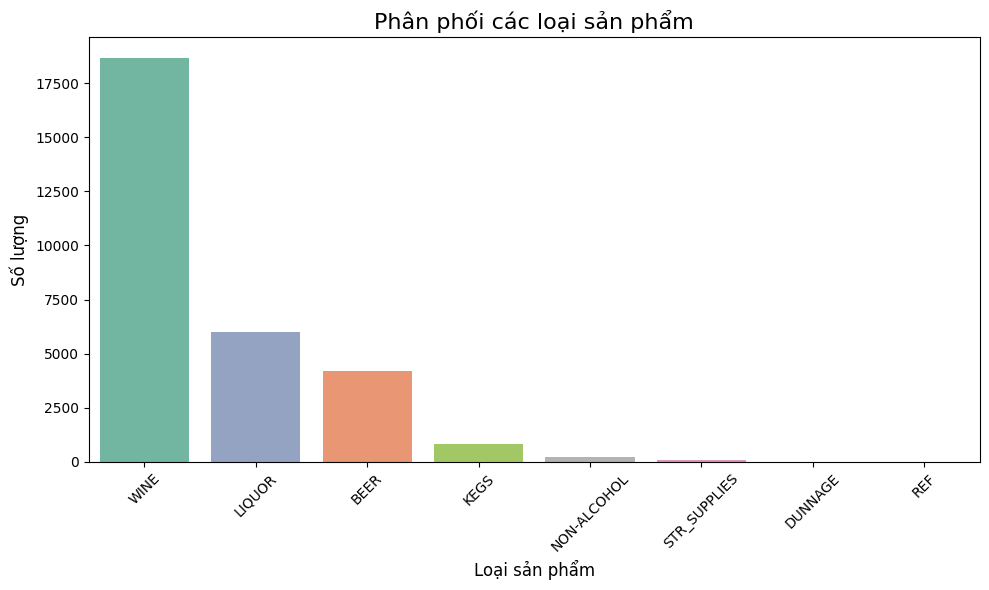

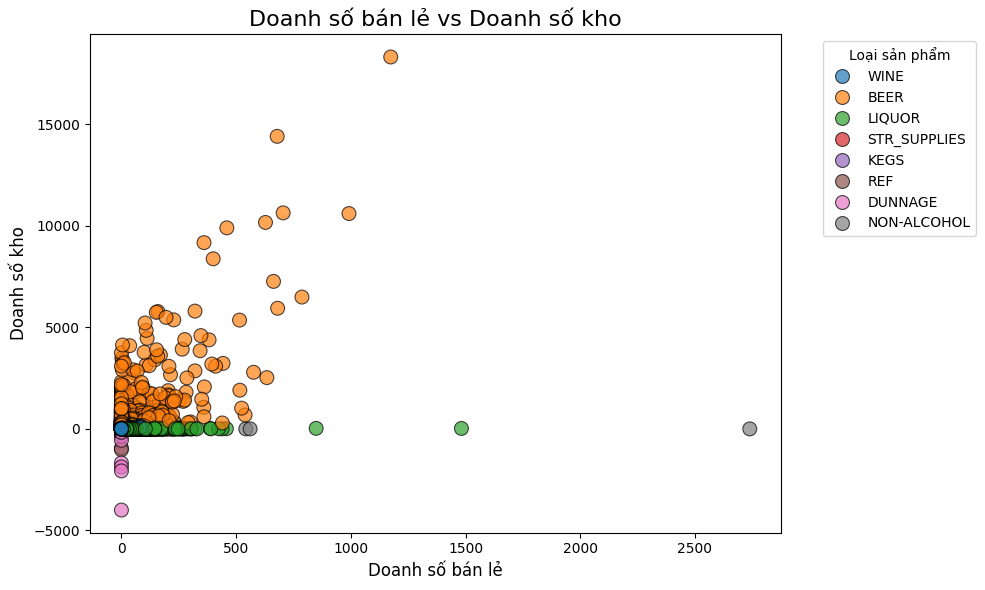

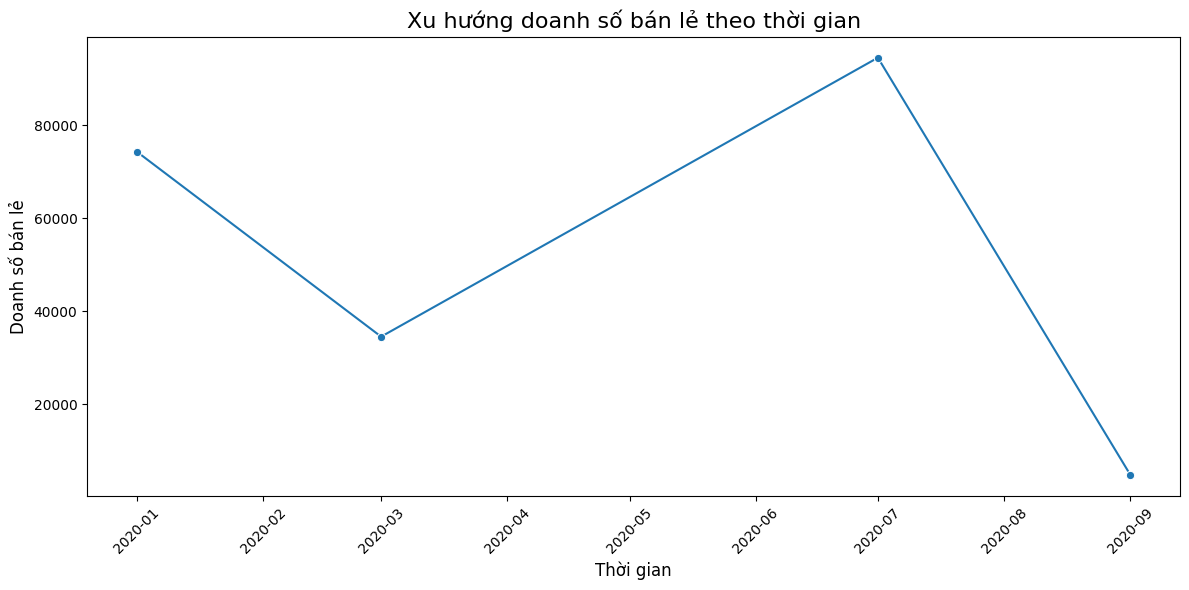

In [4]:

# Đọc file CSV đã tải lên
data = pd.read_csv('Retail and wherehouse Sale.csv')

# Tạo cột DATE kết hợp YEAR và MONTH
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1), errors='coerce')

# 1. Biểu đồ phân phối loại sản phẩm (ITEM TYPE)
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='ITEM TYPE', order=data['ITEM TYPE'].value_counts().index, hue='ITEM TYPE', palette='Set2', legend=False)
plt.title('Phân phối các loại sản phẩm', fontsize=16)
plt.xlabel('Loại sản phẩm', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# 2. Biểu đồ mối quan hệ giữa doanh số bán lẻ và doanh số kho
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='RETAIL SALES', y='WAREHOUSE SALES', hue='ITEM TYPE', alpha=0.7, edgecolor='k', s=100)
plt.title('Doanh số bán lẻ vs Doanh số kho', fontsize=16)
plt.xlabel('Doanh số bán lẻ', fontsize=12)
plt.ylabel('Doanh số kho', fontsize=12)
plt.legend(title='Loại sản phẩm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Biểu đồ xu hướng doanh số bán lẻ theo thời gian
sales_over_time = data.groupby('DATE')['RETAIL SALES'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_over_time, x='DATE', y='RETAIL SALES', marker='o')
plt.title('Xu hướng doanh số bán lẻ theo thời gian', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh số bán lẻ', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

TIỀN XỬ LÍ DỮ LIỆU.

Thu thập dữ liệu : chúng em thu thập dữ liệu trên Kaggle[văn bản liên kết]

Thông tin chi tiết các cột:ng quy định.

YEAR: Năm của dữ liệu bán hàng (2020).

MONTH: Tháng của dữ liệu bán hàng (1 = tháng 1).

SUPPLIER: Tên nhà cung cấp.

ITEM CODE: Mã định danh duy nhất cho sản phẩm

ITEM TYPE: Loại đồ uống (ví dụ: Rượu, Bia).

RETAIL SALES: Tổng mức bán lẻ trong tháng quy định.

RETAIL TRANSFERS: Chuyển khoản bán lẻ giữa các địa điểm trong tháng quy định.

WAREHOUSE SALES: Tổng doanh thu từ kho trong tháng quy định.

In [5]:
df=pd.read_csv('Retail and wherehouse Sale.csv')
#Đọc dữ liệu
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


Giảm chiều dữ liệu.

In [4]:
df =df.drop(columns=['YEAR'])
# Kiểm tra lại các cột sau khi xóa
df.columns

Index(['MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE',
       'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

Xử lí dữ liệu thiếu.

In [5]:
# Kiểm tra số lượng giá trị thiếu trong mỗi cột
print("Số lượng giá trị thiếu trong các cột:")
df.isnull().sum()

Số lượng giá trị thiếu trong các cột:


MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [6]:
df = df.dropna()
#Loại bỏ khoảng trắng trong tên cột
df.columns = df.columns.str.strip()
df.isnull().sum()

MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

Xử lí dữ liệu ngoại lệ.

In [ ]:
# Danh sách các cột số cần kiểm tra ngoại lệ
numeric_columns = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

# Hàm phát hiện và loại bỏ ngoại lệ bằng phương pháp IQR
def remove_outliers(df, columns):
    valid_index = pd.Series(True, index=df.index)  # Khởi tạo Series với tất cả giá trị True

    for column in columns:
        # tính toán các giá trị tứ phân vị
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # khoảng tứ phân vị, IQR là độ lệch chuẩn
        IQR = Q3 - Q1
        #xác định ngưỡng ngoài
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cập nhật chỉ số của các hàng hợp lệ
        valid_index &= (df[column] >= lower_bound) & (df[column] <= upper_bound)

        # In thông tin về số lượng hàng bị loại bỏ
        num_outliers = (~valid_index).sum()
        print(f'Số lượng ngoại lệ trong cột {column}: {num_outliers}')

    # Trả về DataFrame đã loại bỏ ngoại lệ
    return df[valid_index]

# Loại bỏ ngoại lệ trong các cột số
df_clean = remove_outliers(df, numeric_columns)

# Loại bỏ các giá trị thiếu
df_clean = df_clean.dropna()

# Loại bỏ khoảng trắng trong tên cột
df_clean.columns = df_clean.columns.str.strip()

# Kiểm tra số lượng giá trị thiếu sau khi xử lý
print("Số lượng giá trị thiếu sau khi loại bỏ ngoại lệ và giá trị thiếu:")
print(df_clean.isnull().sum())

# Kiểm tra kích thước dữ liệu sau khi loại bỏ ngoại lệ
print("Kích thước dữ liệu sau khi xử lý:")
print(df_clean.shape)


Số lượng ngoại lệ trong cột RETAIL SALES: 5021
Số lượng ngoại lệ trong cột RETAIL TRANSFERS: 5575
Số lượng ngoại lệ trong cột WAREHOUSE SALES: 7269
Số lượng giá trị thiếu sau khi loại bỏ ngoại lệ và giá trị thiếu:
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64
Kích thước dữ liệu sau khi xử lý:
(22698, 8)


Xử lí dữ liệu trùng lặp.

In [6]:
# Kiểm tra và hiển thị số lượng bản ghi trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số lượng bản ghi trùng lặp: {num_duplicates}")

# Nếu có bản ghi trùng lặp, hiển thị chúng
if num_duplicates > 0:
    print("Các bản ghi trùng lặp:")
    display(df[df.duplicated(keep=False)])


Số lượng bản ghi trùng lặp: 0


In [7]:
# Kiểm tra số lượng bản ghi ban đầu
initial_count = df.shape[0]
print(f"Số lượng bản ghi ban đầu: {initial_count}")

# Loại bỏ các bản ghi trùng lặp
df = df.drop_duplicates()

# Kiểm tra số lượng bản ghi sau khi loại bỏ trùng lặp
final_count = df.shape[0]
print(f"Số lượng bản ghi sau khi loại bỏ trùng lặp: {final_count}")

# Số lượng bản ghi trùng lặp đã bị loại bỏ
removed_count = initial_count - final_count
print(f"Số lượng bản ghi trùng lặp đã bị loại bỏ: {removed_count}")

# Kiểm tra lại số lượng bản ghi trùng lặp
remaining_duplicates = df.duplicated().sum()
print(f"Số lượng bản ghi trùng lặp còn lại: {remaining_duplicates}")


Số lượng bản ghi ban đầu: 30000
Số lượng bản ghi sau khi loại bỏ trùng lặp: 30000
Số lượng bản ghi trùng lặp đã bị loại bỏ: 0
Số lượng bản ghi trùng lặp còn lại: 0


Chuẩn hóa dữ liệu

Chuẩn hóa Min-Max và biến đổi dữ liệu.

In [8]:
# Lựa chọn các cột cần chuẩn hóa
columns_to_normalize = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

# Kiểm tra tóm tắt thống kê trước khi chuẩn hóa
print("Tóm tắt dữ liệu trước khi chuẩn hóa:")
print(df[columns_to_normalize].describe())

# Tạo đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Áp dụng chuẩn hóa Min-Max
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Kiểm tra lại tóm tắt thống kê sau khi chuẩn hóa
print("\nTóm tắt dữ liệu sau khi chuẩn hóa:")
print(df[columns_to_normalize].describe())

# Lưu DataFrame đã được chuẩn hóa vào tệp CSV mới
output_file = 'normalized_data.csv'
df.to_csv(output_file, index=False)

# Thông báo khi lưu thành công
print(f"\nDữ liệu đã được chuẩn hóa và lưu vào tệp: {output_file}")

# Tải tệp xuống (chỉ hoạt động trong môi trường notebook hoặc tương tự)
try:
    from google.colab import files
    files.download(output_file)
except ImportError:
    print(f"\nVui lòng tải tệp từ thư mục hiện tại: {output_file}")


Tóm tắt dữ liệu trước khi chuẩn hóa:
       RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count  29999.000000      30000.000000     30000.000000
mean       6.939796          6.594058        27.431031
std       33.081054         27.879428       272.166085
min       -0.420000         -6.000000     -3999.000000
25%        0.000000          0.000000         0.000000
50%        0.160000          0.000000         1.000000
75%        2.920000          3.000000         6.000000
max     2739.000000       1507.000000     18317.000000

Tóm tắt dữ liệu sau khi chuẩn hóa:
       RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
count  29999.000000      30000.000000     30000.000000
mean       0.002687          0.008324         0.180428
std        0.012076          0.018427         0.012196
min        0.000000          0.000000         0.000000
25%        0.000153          0.003966         0.179199
50%        0.000212          0.003966         0.179244
75%        0.001219          0.005948         0

In [9]:
# Bước 1: Đọc tệp CSV vào DataFrame
df = pd.read_csv('normalized_data.csv')

# Kiểm tra dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(df.head())

# Bước 2: Kiểm tra kiểu dữ liệu hiện tại
print("\nKiểu dữ liệu hiện tại của các cột:")
print(df.dtypes)

# Xác định các cột không phải số
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print(f"\nCác cột không phải số: {non_numeric_columns}")

# Ví dụ về các cột cần chuyển đổi sang số
columns_to_convert = ['RETAIL SALES', 'WAREHOUSE SALES'] 

# Kiểm tra cột có tồn tại trong DataFrame không
columns_to_convert = [col for col in columns_to_convert if col in df.columns]

if columns_to_convert:
    print(f"\nĐang chuyển đổi các cột sau sang kiểu số: {columns_to_convert}")

    # Bước 3: Chuyển đổi các cột sang dạng số
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Chuyển đổi, giá trị không chuyển đổi được sẽ thành NaN

        # Kiểm tra các giá trị không thể chuyển đổi
        num_na = df[col].isna().sum()
        if num_na > 0:
            print(f"Có {num_na} giá trị trong cột {col} không thể chuyển đổi và đã được đặt thành NaN.")
else:
    print("\nKhông có cột nào cần chuyển đổi hoặc các cột đã tồn tại trong DataFrame.")

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print("\nKiểu dữ liệu sau khi chuyển đổi:")
print(df.dtypes)

# Kiểm tra dữ liệu sau khi chuyển đổi
print("\nDữ liệu sau khi chuyển đổi:")
print(df.head())

# Lưu DataFrame đã chuyển đổi về tệp CSV (nếu cần)
# df.to_csv('normalized_data_converted.csv', index=False)


Dữ liệu ban đầu:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE      0.000153   
1            MOMENT DE PLAISIR - 750ML      WINE      0.000153   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER      0.000153   
3        SCHLINK HAUS KABINETT - 750ML      WINE      0.000153   
4       SANTORINI GAVALA WHITE - 750ML      WINE      0.000453   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0          0.003966         0.179288  
1          0.004627         0.179378  
2          0.003966         0.179244  
3          0.003966         0.179244  
4          0



Biểu đồ sau khi tiền xử lí.

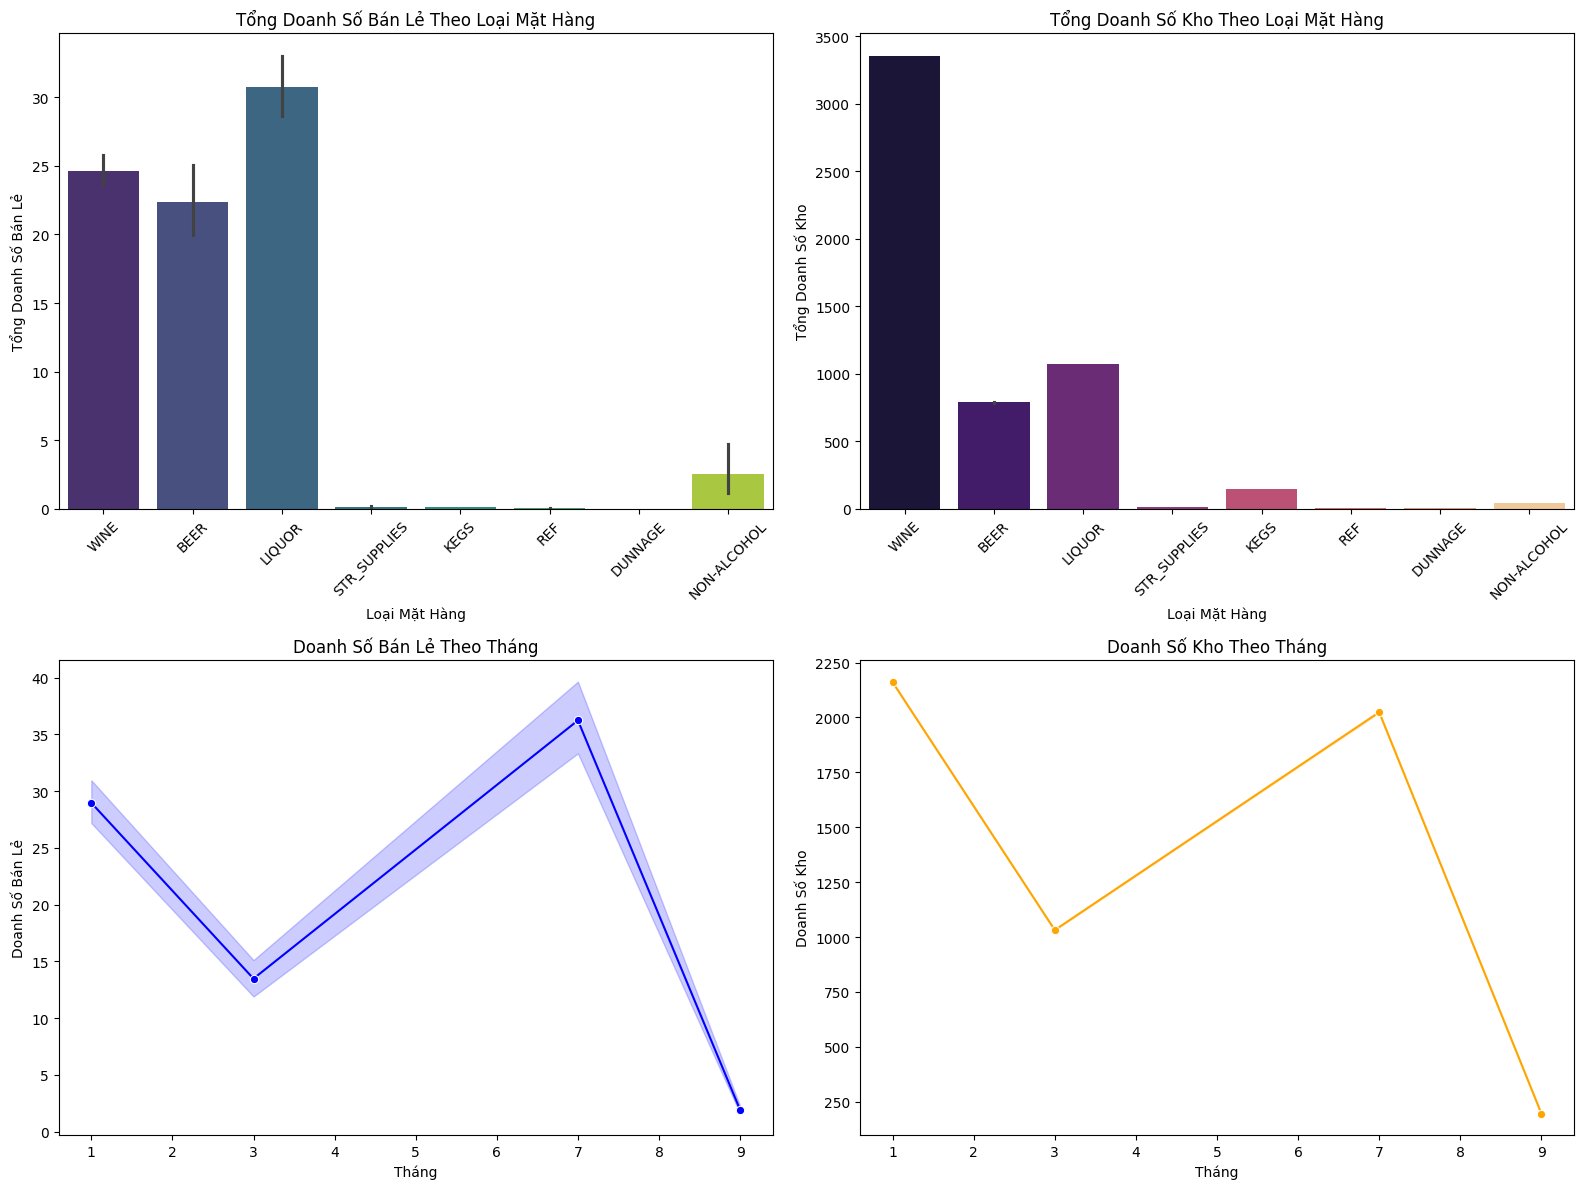

In [10]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('normalized_data.csv')

# Kiểm tra xem các cột cần thiết có tồn tại không
required_columns = ['ITEM TYPE', 'RETAIL SALES', 'WAREHOUSE SALES', 'MONTH']
if not all(col in df.columns for col in required_columns):
    raise ValueError("Một hoặc nhiều cột yêu cầu không có trong DataFrame.")

# Thiết lập kích thước và số lượng biểu đồ
plt.figure(figsize=(16, 12))

# 1. Biểu đồ tổng doanh số bán lẻ theo loại mặt hàng (ITEM TYPE)
plt.subplot(2, 2, 1)
sns.barplot(x='ITEM TYPE', y='RETAIL SALES', data=df, estimator=sum, hue='ITEM TYPE', palette='viridis', legend=False)
plt.title('Tổng Doanh Số Bán Lẻ Theo Loại Mặt Hàng')
plt.xlabel('Loại Mặt Hàng')
plt.ylabel('Tổng Doanh Số Bán Lẻ')
plt.xticks(rotation=45)

# 2. Biểu đồ tổng doanh số kho theo loại mặt hàng (ITEM TYPE)
plt.subplot(2, 2, 2)
sns.barplot(x='ITEM TYPE', y='WAREHOUSE SALES', data=df, estimator=sum, hue='ITEM TYPE', palette='magma', legend=False)
plt.title('Tổng Doanh Số Kho Theo Loại Mặt Hàng')
plt.xlabel('Loại Mặt Hàng')
plt.ylabel('Tổng Doanh Số Kho')
plt.xticks(rotation=45)

# 3. Biểu đồ doanh số bán lẻ theo tháng (MONTH)
plt.subplot(2, 2, 3)
sns.lineplot(x='MONTH', y='RETAIL SALES', data=df, estimator=sum, marker='o', color='blue')
plt.title('Doanh Số Bán Lẻ Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh Số Bán Lẻ')

# 4. Biểu đồ doanh số kho theo tháng (MONTH)
plt.subplot(2, 2, 4)
sns.lineplot(x='MONTH', y='WAREHOUSE SALES', data=df, estimator=sum, marker='o', color='orange')
plt.title('Doanh Số Kho Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh Số Kho')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()

In [16]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('normalized_data.csv')

# Kiểm tra xem các cột cần thiết có tồn tại không
required_columns = ['ITEM TYPE', 'RETAIL SALES', 'WAREHOUSE SALES', 'MONTH']
if not all(col in df.columns for col in required_columns):
    raise ValueError("Một hoặc nhiều cột yêu cầu không có trong DataFrame.")


In [14]:
# Tính trung vị cho các cột RETAIL SALES và WAREHOUSE SALES
median_retail_sales = df['RETAIL SALES'].median()
median_warehouse_sales = df['WAREHOUSE SALES'].median()
median_retail_transfers = df['RETAIL TRANSFERS'].median()

print(f"Trung vị của RETAIL SALES: {median_retail_sales}")
print(f"Trung vị của WAREHOUSE SALES: {median_warehouse_sales}")
print(f"Trung vị của RETAIL TRANSFERS: {median_retail_transfers}")

Trung vị của RETAIL SALES: 0.0002117236495316
Trung vị của WAREHOUSE SALES: 0.1792435920415845
Trung vị của RETAIL TRANSFERS: 0.0039656311962987


1. Thuật toán FPgrowth

In [18]:
# Bước 1: Tiền xử lý dữ liệu và chuyển đổi thành one-hot encoding cho cột 'MONTH'
# Nhóm dữ liệu theo 'RETAIL SALES' và 'MONTH', tính tổng 'WAREHOUSE SALES' cho từng nhóm
basket = df.groupby(['RETAIL SALES', 'MONTH'])['WAREHOUSE SALES'].sum().unstack().reset_index().fillna(0)

# Chuyển đổi dữ liệu thành dạng nhị phân (True/False) để sử dụng cho fpgrowth
# Các giá trị lớn hơn 0 sẽ chuyển thành True, ngược lại là False
basket = basket > 0

# Bước 2: Khai thác tập mục thường xuyên (frequent itemsets) bằng thuật toán fpgrowth
# Sử dụng min_support=0.05 để chỉ chọn các tập mục có độ hỗ trợ tối thiểu là 5%
frequent_itemsets = fpgrowth(basket, min_support=0.05, use_colnames=True)

# Bước 3: Tạo các luật kết hợp dựa trên các tập mục thường xuyên tìm được
# Sử dụng thước đo 'lift' với ngưỡng min_threshold=1 ( 100% )
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)

# Hiển thị tất cả các luật kết hợp
print("Các luật kết hợp:")
print(rules)

# Bước 4: Lọc các luật mạnh có 'lift' lớn hơn 1
strong_rules = rules[rules['lift'] > 1]

# Hiển thị các luật mạnh (strong rules) tìm được
print("\nCác luật mạnh fpgrowth:")
print(strong_rules)


Các luật kết hợp:
       antecedents           consequents  antecedent support  \
0              (1)        (RETAIL SALES)            0.579437   
1   (RETAIL SALES)                   (1)            0.999727   
2           (1, 7)        (RETAIL SALES)            0.298059   
3   (RETAIL SALES)                (1, 7)            0.999727   
4              (3)        (RETAIL SALES)            0.300793   
..             ...                   ...                 ...   
69          (9, 7)     (1, RETAIL SALES)            0.065901   
70             (1)  (9, RETAIL SALES, 7)            0.579437   
71  (RETAIL SALES)             (1, 9, 7)            0.999727   
72             (9)  (1, RETAIL SALES, 7)            0.089691   
73             (7)  (1, RETAIL SALES, 9)            0.614165   

    consequent support   support  confidence      lift  representativity  \
0             0.999727  0.579437    1.000000  1.000274               1.0   
1             0.579437  0.579437    0.579595  1.000274       

2. Thuật toán Apriori

In [26]:
# Bước 1: Tiền xử lý dữ liệu và chuyển đổi thành one-hot encoding cho cột 'MONTH'
# Nhóm dữ liệu theo 'RETAIL SALES' và 'MONTH', tính tổng 'WAREHOUSE SALES' cho từng nhóm
basket = df.groupby(['RETAIL SALES', 'MONTH'])['WAREHOUSE SALES'].sum().unstack().reset_index().fillna(0)

# Chuyển đổi dữ liệu thành dạng nhị phân (True/False) để sử dụng cho apriori
# Các giá trị lớn hơn 0 sẽ chuyển thành True, ngược lại là False
basket = basket > 0

# Bước 2: Khai thác tập mục thường xuyên (frequent itemsets) bằng thuật toán apriori
# Sử dụng min_support=0.05 để chỉ chọn các tập mục có độ hỗ trợ tối thiểu là 5%
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Bước 3: Tạo các luật kết hợp dựa trên các tập mục thường xuyên tìm được
# Sử dụng thước đo 'lift' với ngưỡng min_threshold=1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)

# Hiển thị tất cả các luật kết hợp
print("Các luật kết hợp:")
print(rules)

# Bước 4: Lọc các luật mạnh có 'lift' lớn hơn 1
strong_rules = rules[rules['lift'] > 1]

# Hiển thị các luật mạnh (strong rules) tìm được
print("\nCác luật mạnh apriori:")
print(strong_rules)

Các luật kết hợp:
       antecedents           consequents  antecedent support  \
0              (1)        (RETAIL SALES)            0.579437   
1   (RETAIL SALES)                   (1)            0.999727   
2              (3)        (RETAIL SALES)            0.300793   
3   (RETAIL SALES)                   (3)            0.999727   
4              (9)        (RETAIL SALES)            0.089691   
..             ...                   ...                 ...   
69          (9, 7)     (1, RETAIL SALES)            0.065901   
70             (1)  (9, RETAIL SALES, 7)            0.579437   
71  (RETAIL SALES)             (1, 9, 7)            0.999727   
72             (9)  (1, RETAIL SALES, 7)            0.089691   
73             (7)  (1, RETAIL SALES, 9)            0.614165   

    consequent support   support  confidence      lift  representativity  \
0             0.999727  0.579437    1.000000  1.000274               1.0   
1             0.579437  0.579437    0.579595  1.000274       